## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('emails.csv')

In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [6]:
df.shape

(5728, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## Visualisation

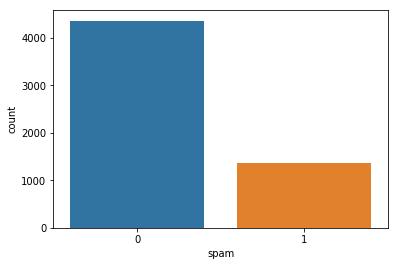

In [9]:
sns.countplot(df['spam'])

In [10]:
spam_yes = df[df['spam']==1]
spam_no = df[df['spam']==0]

In [11]:
spam_yes.shape

(1368, 2)

In [12]:
spam_no.shape

(4360, 2)

In [15]:
print('Spam Percentage = ',len(spam_yes)/len(df)*100,'%')
print('Not Spam Percentage = ',len(spam_no)/len(df)*100,'%')

Spam Percentage =  23.88268156424581 %
Not Spam Percentage =  76.11731843575419 %


## Applying CountVectorizer on the dataset

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
transformed_text = vectorizer.fit_transform(df['text'])

In [19]:
transformed_text.shape

(5728, 37303)

## Training the Model using dummy data

In [21]:
labels = df['spam'].values

In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(transformed_text,labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
testing_sample = ['Free Money!!!','Hi Akshiv, please let me know if u need any further information.']
testing_sample_transformed = vectorizer.transform(testing_sample)

In [24]:
preds = classifier.predict(testing_sample_transformed)

In [26]:
preds

array([1, 0])

## Splitting the data into training and test sets

In [27]:
X = transformed_text
y = labels

In [28]:
X.shape

(5728, 37303)

In [29]:
y.shape

(5728,)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier_naive = MultinomialNB()
classifier_naive.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Evaluating the Model

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
y_pred_train = classifier_naive.predict(X_train)
y_pred_test = classifier_naive.predict(X_test)

In [34]:
cm_train = confusion_matrix(y_train,y_pred_train)
cm_test = confusion_matrix(y_test,y_pred_test)

In [35]:
## Plotting the train results

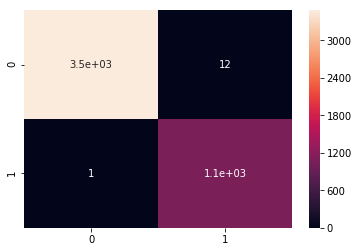

In [36]:
sns.heatmap(cm_train,annot=True)

In [37]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3489
           1       0.99      1.00      0.99      1093

   micro avg       1.00      1.00      1.00      4582
   macro avg       0.99      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582



In [38]:
## Plotting the test results

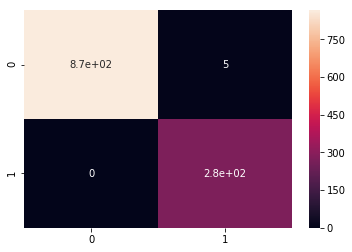

In [39]:
sns.heatmap(cm_test,annot=True)

In [40]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       871
           1       0.98      1.00      0.99       275

   micro avg       1.00      1.00      1.00      1146
   macro avg       0.99      1.00      0.99      1146
weighted avg       1.00      1.00      1.00      1146

